In [1]:
import swarms
import matplotlib.pyplot as plt
import numpy as np
from swarms import MEARTH, PC, MSUN, LSUN, YEAR, KM, GCC, AU, MJUP, MICRON
%matplotlib inline

try:
    plt.style.use('paper')
except:
    pass

In [2]:
Q=0.1
Dc = 100*KM
rho = 1*GCC
eta = 0.3
Dt = 100 # m
fQ = 5
age = 7.5e6*YEAR
Mstar = 0.5*MSUN
Mp = 2*MJUP
a = 60*AU
lamb = 1.65*MICRON
minAgeBaraffe = 1.1e7*YEAR

Npts = 10

star = swarms.Star((Mstar/MSUN)**4*LSUN, Mstar, 3600, d=55*PC)
Mplts = np.logspace(np.log10(0.03), np.log10(5), Npts)*MJUP # ~Neptune to 5 Mj
CRs = np.zeros(Npts)
CR1, CR2, CR4 = np.zeros(Npts), np.zeros(Npts), np.zeros(Npts)

MminBaraffe = 0.07*MJUP
for i, M in enumerate(Mplts):
    planet = swarms.Planet(star, M=max(M, MminBaraffe), R=None, a=a, Q=0.5, age=minAgeBaraffe, Z='002')
    CRs[i] = planet.computeCRthermal(lamb)
    swarm1 = swarms.CollSwarm(star, planet, M0=1*MEARTH, Dt=Dt, Dmax=Dc, eta=eta, Q=Q, age=age)
    swarm2 = swarms.CollSwarm(star, planet, M0=1.e-2*MEARTH, Dt=Dt, Dmax=Dc, eta=eta, Q=Q, age=age)
    CR1[i] = swarm1.computeCRscat()
    CR2[i] = swarm2.computeCRscat()
    
CRstime, CRs1time = np.zeros(Npts), np.zeros(Npts)
times = np.logspace(np.log10(1.1e7), 10, Npts)*YEAR
for i, time in enumerate(times):
    planet = swarms.Planet(star, M=Mp, R=None, a=a, Q=0.5, age=time, Z='002')
    CRstime[i] = planet.computeCRthermal(lamb)
    swarm1 = swarms.CollSwarm(star, planet, M0=1*MEARTH, Dt=Dt, Dmax=Dc, eta=eta, Q=Q, age=time)
    CRs1time[i] = swarm1.computeCRscat()

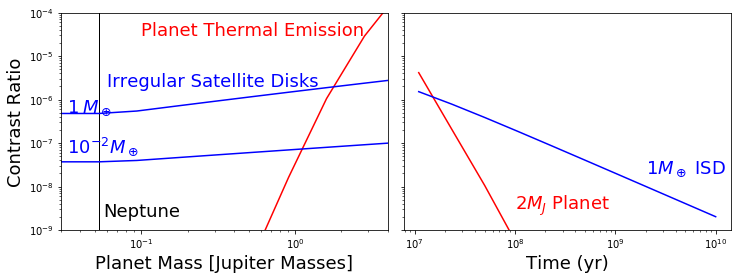

In [3]:
fig, axarr = plt.subplots(figsize=(12,4), ncols=2, sharey=True)
plt.subplots_adjust(wspace=0.05)
    
axarr[0].loglog(Mplts/MJUP, CRs, 'r')
axarr[0].loglog(Mplts/MJUP, CR1, 'b')
axarr[0].loglog(Mplts/MJUP, CR2, 'b')
contrast_thresh = 1.e-6    
axarr[0].vlines(17/318, 1.e-16, 1, lw=1, color='k')

axarr[0].text(18/318, 2.e-9, "Neptune", color='k', fontsize=18)
axarr[0].text(0.1, 3.e-5, r"Planet Thermal Emission", color='r', fontsize=18)
axarr[0].text(0.06, 2.e-6, "Irregular Satellite Disks", color='b', fontsize=18)
axarr[0].text(0.033, 5.e-7, r"$1\:M_\oplus$", color='b', fontsize=18)
axarr[0].text(0.033, 6.e-8, r"$10^{-2} M_\oplus$", color='b', fontsize=18)
axarr[0].set_xlabel("Planet Mass [Jupiter Masses]", fontsize=18)
axarr[0].set_ylabel("Contrast Ratio", fontsize=18)
axarr[0].set_yscale('log')
axarr[0].set_xscale('log')
axarr[0].set_ylim([1e-9, 1e-4])
axarr[0].set_xlim([0.03, 4])
axarr[1].loglog(times/YEAR, CRstime, 'r')
axarr[1].loglog(times/YEAR, CRs1time, 'b')
axarr[1].set_xlabel("Time (yr)", fontsize=18)
axarr[1].text(2.e9, 2.e-8, r"$1 M_\oplus$ ISD", color='b', fontsize=18)
axarr[1].text(1.e8, 3.e-9, r"$2M_J$ Planet", color='r', fontsize=18)
fig.savefig('CRscalings.pdf', bbox_inches='tight')